<a href="https://colab.research.google.com/github/OlhaYastrebova/goit-ds-hw/blob/main/Hw_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Завантажуємо дані
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізуємо дані
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding міток
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras import Input

model = models.Sequential()

# Вхідний шар
model.add(Input(shape=(28, 28, 1)))

# Шар згортки
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Додаткові шари згортки
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Перетворення до одного виміру
model.add(layers.Flatten())

# Щільний шар
model.add(layers.Dense(128, activation='relu'))

# Вихідний шар
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Тренуємо модель
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінюємо модель
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних: {test_acc}')


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6974 - loss: 0.8229 - val_accuracy: 0.8462 - val_loss: 0.4140
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.8643 - loss: 0.3738 - val_accuracy: 0.8695 - val_loss: 0.3515
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.8868 - loss: 0.3096 - val_accuracy: 0.8879 - val_loss: 0.3115
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.8970 - loss: 0.2756 - val_accuracy: 0.8986 - val_loss: 0.2828
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.9098 - loss: 0.2479 - val_accuracy: 0.8999 - val_loss: 0.2767
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9188 - loss: 0.2207 - val_accuracy: 0.9076 - val_loss: 0.2580
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9244 - loss: 0.2047 - val_accuracy: 0.9089 - val_loss: 0.2718
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9306 - loss: 0.1885 - 

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Прогнозування на тестових даних
y_pred = model.predict(test_images)

# Перетворюємо one-hot encoded мітки на звичайні
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Виведення classification_report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.83      0.90      0.87      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.87      0.84      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.75      0.74      0.74      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Додавання регуляризації

In [ ]:
# Побудова моделі
model = models.Sequential()

# Вхідний шар
model.add(layers.Input(shape=(28, 28, 1)))

# Шар згортки
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Додаємо Dropout після шару MaxPooling

# Додаткові шари згортки
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Додаємо Dropout після шару MaxPooling

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Перетворення до одного виміру
model.add(layers.Flatten())

# Щільний шар з регуляризацією (Dropout)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))  # Dropout після Dense шару

# Вихідний шар
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Тренування моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних: {test_acc}')


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.6332 - loss: 1.0022 - val_accuracy: 0.8390 - val_loss: 0.4345
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.8277 - loss: 0.4727 - val_accuracy: 0.8684 - val_loss: 0.3564
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8543 - loss: 0.3994 - val_accuracy: 0.8639 - val_loss: 0.3629
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.8673 - loss: 0.3653 - val_accuracy: 0.8915 - val_loss: 0.2982
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.8780 - loss: 0.3384 - val_accuracy: 0.8918 - val_loss: 0.2892
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.8823 - loss: 0.3203 - val_accuracy: 0.8923 - val_loss: 0.2852
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8903 - loss: 0.3028 - val_accuracy: 0.8993 - val_loss: 0.2693
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8894 - loss: 0.2982 - 

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Прогнозування на тестових даних
y_pred = model.predict(test_images)

# Перетворюємо one-hot encoded мітки на звичайні
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Виведення classification_report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.69      0.73      0.71      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Зміна кількості шарів, нейронів та епох

In [ ]:
# Побудова моделі
model = models.Sequential()

# Вхідний шар
model.add(layers.Input(shape=(28, 28, 1)))

# Шар згортки
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Додаткові шари згортки
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Перетворення до одного виміру
model.add(layers.Flatten())

# Щільні шари
model.add(layers.Dense(256, activation='relu'))  # Додаємо Dense шар із 256 нейронами
model.add(layers.Dense(128, activation='relu'))  # Додаємо ще один Dense шар із 128 нейронами

# Вихідний шар
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Тренування моделі
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних: {test_acc}')

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6942 - loss: 0.8206 - val_accuracy: 0.8470 - val_loss: 0.4209
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 65ms/step - accuracy: 0.8643 - loss: 0.3686 - val_accuracy: 0.8791 - val_loss: 0.3311
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.8914 - loss: 0.2929 - val_accuracy: 0.8907 - val_loss: 0.3107
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9019 - loss: 0.2639 - val_accuracy: 0.8944 - val_loss: 0.2892
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.9120 - loss: 0.2358 - val_accuracy: 0.9018 - val_loss: 0.2689
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9230 - loss: 0.2104 - val_accuracy: 0.8986 - val_loss: 0.2872
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.9303 - loss: 0.1902 - val_accuracy: 0.9081 - val_loss: 0.2597
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9365 - loss: 0.1719 - 

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Прогнозування на тестових даних
y_pred = model.predict(test_images)

# Перетворюємо one-hot encoded мітки на звичайні
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Виведення classification_report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.88      0.85      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.88      0.81      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних: {test_acc}')

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.9833 - loss: 0.0486 - val_accuracy: 0.9096 - val_loss: 0.5352
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9863 - loss: 0.0368 - val_accuracy: 0.9071 - val_loss: 0.5771
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.9874 - loss: 0.0351 - val_accuracy: 0.9082 - val_loss: 0.5851
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.9879 - loss: 0.0354 - val_accuracy: 0.9060 - val_loss: 0.5926
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9875 - loss: 0.0340 - val_accuracy: 0.9077 - val_loss: 0.5984
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.9886 - loss: 0.0317 - val_accuracy: 0.9046 - val_loss: 0.6445
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9895 - loss: 0.0308 - val_accuracy: 0.9087 - val_loss: 0.6871
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.9898 - loss: 0.0289 - 

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Прогнозування на тестових даних
y_pred = model.predict(test_images)

# Перетворюємо one-hot encoded мітки на звичайні
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Виведення classification_report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.82      0.89      0.85      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.87      0.86      0.86      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.77      0.70      0.73      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Висновок. Перша і остання моделі дають достатню точність - 91 %.

Згорткова нейронна мережа (CNN) значно перевершує багатошарову мережу (MLP) у задачах класифікації зображень, оскільки вона краще працює з просторовими структурами зображень та може ефективніше розрізняти схожі класи.

MLP має свої переваги у швидкості навчання і простоті, проте для класифікації зображень CNN є кращим вибором.
Зважаючи на це, CNN є більш підходящою архітектурою для класифікації даних типу Fashion MNIST.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Перетворення зображень у формат RGB (VGG16 очікує 3 канали)
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, -1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, -1))

In [4]:
# Перетворення в float32 і нормалізація даних
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

In [5]:
# Зміна розміру зображень до 32x32 (найменший розмір, який підтримує VGG16)
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

In [6]:
# Завантаження VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Заморожування перших шарів (виділення ознак)
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [8]:
# Створення моделі
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

In [9]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Функція для зміни швидкості навчання
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return float(lr * np.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [11]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=30,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[callback])

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7443 - loss: 0.7145 - val_accuracy: 0.8598 - val_loss: 0.3752 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8823 - loss: 0.3319 - val_accuracy: 0.8866 - val_loss: 0.3312 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8971 - loss: 0.2904 - val_accuracy: 0.8957 - val_loss: 0.2959 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9029 - loss: 0.2603 - val_accuracy: 0.9056 - val_loss: 0.2715 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9064 - loss: 0.2464 - val_accuracy: 0.8917 - val_loss: 0.2936 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9075 - loss: 0.2181 - val_accuracy: 0.8932 - val_loss: 0.2875 - learning_rate: 9.0484e-04
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9071 -

In [12]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 6s - 18ms/step - accuracy: 0.9082 - loss: 0.9783

Точність на тестових даних: 0.9082000255584717


In [13]:
# Розморожування всіх шарів для тонкого налаштування
base_model.trainable = True

In [14]:
# Перекомпіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Донавчання моделі
history_fine = model.fit(train_images, train_labels, epochs=15,
                         validation_split=0.2,
                         batch_size=64,
                         callbacks=[callback])

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9283 - loss: 0.1931 - val_accuracy: 0.8238 - val_loss: 0.4186 - learning_rate: 0.0010
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8833 - loss: 0.1870 - val_accuracy: 0.8662 - val_loss: 0.3109 - learning_rate: 0.0010
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8906 - loss: 0.1637 - val_accuracy: 0.8825 - val_loss: 0.3131 - learning_rate: 0.0010
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8896 - loss: 0.1657 - val_accuracy: 0.8217 - val_loss: 0.3604 - learning_rate: 0.0010
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8928 - loss: 0.1563 - val_accuracy: 0.8438 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8871 - loss: 0.1405 - val_accuracy: 0.8403 - val_loss: 0.3287 - learning_rate: 9.0484e-04
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8786

In [16]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 2s - 8ms/step - accuracy: 0.8450 - loss: 0.6168

Точність на тестових даних: 0.8450000286102295


In [17]:
# Функція для побудови графіків
def plot_learning_curves(history, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Графік точності
    ax1.plot(history.history['accuracy'], label='Тренувальна вибірка')
    ax1.plot(history.history['val_accuracy'], label='Валідаційна вибірка')
    ax1.set_title(f'Точність моделі {title_suffix}')
    ax1.set_ylabel('Точність')
    ax1.set_xlabel('Епоха')
    ax1.legend()

    # Графік втрат
    ax2.plot(history.history['loss'], label='Тренувальна вибірка')
    ax2.plot(history.history['val_loss'], label='Валідаційна вибірка')
    ax2.set_title(f'Втрати моделі {title_suffix}')
    ax2.set_ylabel('Втрати')
    ax2.set_xlabel('Епоха')
    ax2.legend()

    plt.tight_layout()
    plt.show()

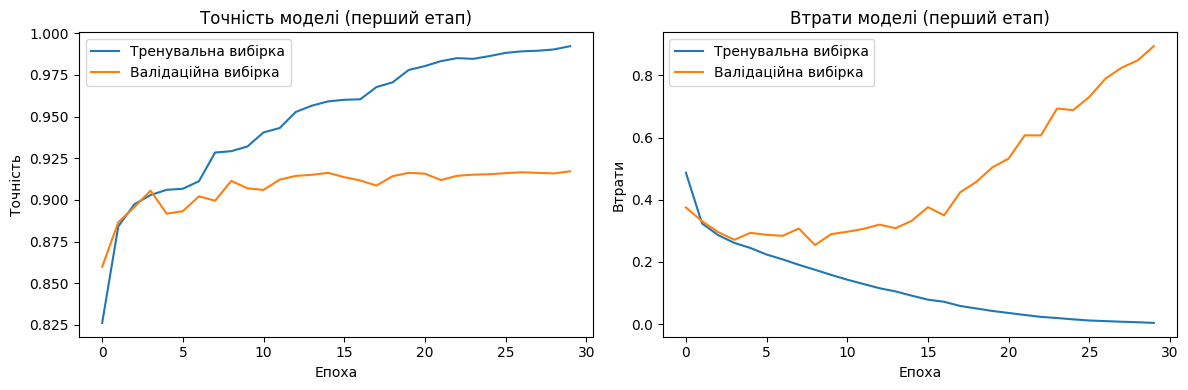

In [18]:
# Побудова графіків для першого етапу навчання
plot_learning_curves(history, "(перший етап)")

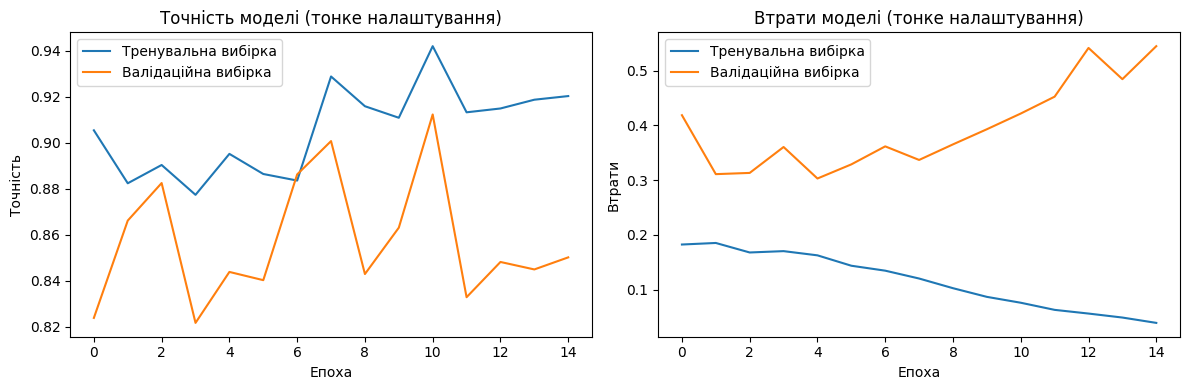

In [19]:
# Побудова графіків для етапу тонкого налаштування
plot_learning_curves(history_fine, "(тонке налаштування)")